Data Loaded Successfully.

--- Missing Data Check (Before) ---
traveltime    69
dtype: int64

--- Missing Data Check (After) ---
All missing values have been handled successfully.

Categorical Data Encoded (Skipped: All features numeric).

Preprocessing Complete.
Training Data Size: 519
Testing Data Size: 130

Example New Prediction: [18.61421015]

--- ACTUAL vs PREDICTED ---
    Actual       Predicted
      19.0       18.614210
      12.0       11.318022
      18.0       18.716482
      11.0       11.245505
      11.0       11.681734
      17.0       16.875384
      18.0       17.604586
       8.0        9.131213
      10.0       10.467948
      11.0       10.495092

--- MODEL EVALUATION ---
R-Squared: 0.8635
MAE:      0.7460
RMSE:     1.1536

 PREDICT BASED ON TOP 4 FEATURES
The Top 4 features are: ['G1', 'G2', 'studytime', 'failures']
Please enter values for these features:

------------------------------
PREDICTED RESULT (G3): 14.6718
------------------------------


c:\Users\hodam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


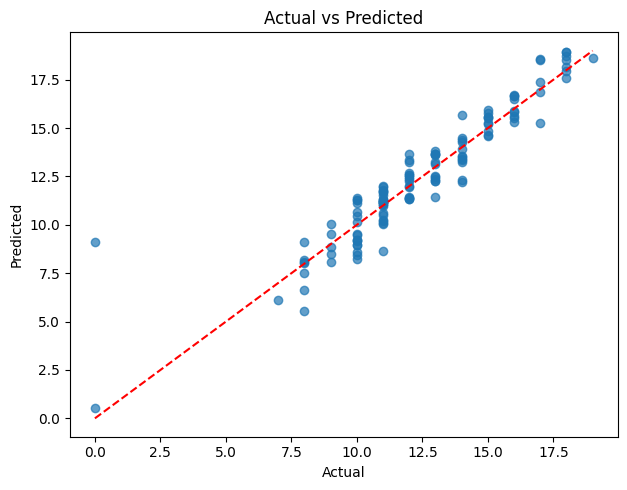

In [14]:
'''# ==========================================
# STEP 1: IMPORT LIBRARIES
# ==========================================
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# STEP 2: IMPORT DATASET & SETUP
# ==========================================
# UPDATE THIS PATH TO YOUR LOCAL FILE
file_path = r"C:\DataMinig project\student-por.csv.csv"

try:
    dataset = pd.read_csv(file_path)
    print("Data Loaded Successfully.\n")
except FileNotFoundError:
    print("Error: File not found.")
    # Stop execution if no file
    dataset = pd.DataFrame() 

if not dataset.empty:
    dataset.columns = dataset.columns.str.strip()

    # CONSTANT FEATURES (Used for training)
    features_to_use = ['G1', 'G2', 'studytime', 'failures', 'absences', 'traveltime']
    target_col = 'G3'

    X = dataset[features_to_use]
    y = dataset[target_col]

    # ==========================================
    # STEP 3: HANDLE MISSING DATA & DISPLAY
    # ==========================================
    print("--- Missing Data Check (Before) ---")
    missing_count = X.isnull().sum()
    if missing_count.sum() > 0:
        print(missing_count[missing_count > 0])
    else:
        print("No missing data found.")

    # Impute
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)

    print("\n--- Missing Data Check (After) ---")
    print("All missing values have been handled successfully.")
    print("\nCategorical Data Encoded (Skipped: All features numeric).")
    print("\nPreprocessing Complete.")

    # ==========================================
    # STEP 4: SPLIT & SCALE
    # ==========================================
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training Data Size: {len(X_train)}")
    print(f"Testing Data Size: {len(X_test)}")

    sc = StandardScaler()
    # Keep as DataFrame to maintain column names
    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
    X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X.columns)

    # ==========================================
    # STEP 5: TRAIN MODEL
    # ==========================================
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # ==========================================
    # STEP 6: PREDICTION & EVALUATION OUTPUT
    # ==========================================
    y_pred = model.predict(X_test_scaled)

    # Example New Prediction
    print(f"\nExample New Prediction: {model.predict(X_test_scaled.iloc[[0]])}")

    print("\n--- ACTUAL vs PREDICTED ---")
    print(f"{'Actual':>10} {'Predicted':>15}")
    
    # LIMIT TABLE TO 10 ROWS
    for i in range(10): 
        print(f"{y_test.iloc[i]:>10.1f} {y_pred[i]:>15.6f}")

    # EVALUATION METRICS (Ensured visibility)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("\n--- MODEL EVALUATION ---")
    print(f"R-Squared: {r2:.4f}")
    print(f"MAE:      {mae:.4f}")
    print(f"RMSE:     {rmse:.4f}")

    # ==========================================
    # STEP 7: INTERACTIVE INPUT (TOP 4 FIXED)
    # ==========================================
    print("\n" + "="*40)
    print(" PREDICT BASED ON TOP 4 FEATURES")
    print("="*40)

    # HARDCODED FEATURES AS REQUESTED
    top_feature_names = ['G1', 'G2', 'studytime', 'failures']
    
    print(f"The Top 4 features are: {top_feature_names}")
    print("Please enter values for these features:")

    # Prepare input holder (defaults to mean of training data)
    user_input_data = X.mean().to_dict()

    # Input Loop
    for feature in top_feature_names:
        min_val = dataset[feature].min()
        max_val = dataset[feature].max()
        
        while True:
            try:
                val = float(input(f" -> Enter value for '{feature}' (Range: {min_val} - {max_val}): "))
                user_input_data[feature] = val
                break
            except ValueError:
                print("Invalid input. Please enter a number.")

    # Predict User Input
    input_df = pd.DataFrame([user_input_data], columns=X.columns)
    input_scaled = sc.transform(input_df)
    final_prediction = model.predict(input_scaled)

    print("\n" + "-"*30)
    print(f"PREDICTED RESULT ({target_col}): {final_prediction[0]:.4f}")
    print("-"*30)

    # ==========================================
    # STEP 8: VISUALIZATION
    # ==========================================
    
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")



    plt.tight_layout()
    plt.show()'''

In [ ]:
# ==========================================
# STEP 1: IMPORT LIBRARIES
# ==========================================
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ==========================================
# STEP 2: IMPORT DATASET & SETUP
# ==========================================
# UPDATE THIS PATH TO YOUR LOCAL FILE
file_path = r"C:\DataMinig project\student-por.csv.csv"

try:
    dataset = pd.read_csv(file_path)
    print("Data Loaded Successfully.\n")
except FileNotFoundError:
    print("Error: File not found.")
    # Stop execution if no file
    dataset = pd.DataFrame() 

if not dataset.empty:
    dataset.columns = dataset.columns.str.strip()

    # CONSTANT FEATURES (Used for training)
    features_to_use = ['G1', 'G2', 'studytime', 'failures', 'absences', 'traveltime']
    target_col = 'G3'

    X = dataset[features_to_use]
    y = dataset[target_col]

In [ ]:
# ==========================================
    # STEP 3: HANDLE MISSING DATA & DISPLAY
    # ==========================================
    print("--- Missing Data Check (Before) ---")
    missing_count = X.isnull().sum()
    if missing_count.sum() > 0:
        print(missing_count[missing_count > 0])
    else:
        print("No missing data found.")

    # Impute
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)

    print("\n--- Missing Data Check (After) ---")
    print("All missing values have been handled successfully.")
    print("\nCategorical Data Encoded (Skipped: All features numeric).")
    print("\nPreprocessing Complete.")

In [ ]:
# ==========================================
    # STEP 4: SPLIT & SCALE
    # ==========================================
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training Data Size: {len(X_train)}")
    print(f"Testing Data Size: {len(X_test)}")

    sc = StandardScaler()
    # Keep as DataFrame to maintain column names
    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
    X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X.columns)

In [ ]:
    # ==========================================
    # STEP 5: TRAIN MODEL
    # ==========================================
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)


In [ ]:
# ==========================================
    # STEP 6: PREDICTION & EVALUATION OUTPUT
    # ==========================================
    y_pred = model.predict(X_test_scaled)

    # Example New Prediction
    print(f"\nExample New Prediction: {model.predict(X_test_scaled.iloc[[0]])}")

    print("\n--- ACTUAL vs PREDICTED ---")
    print(f"{'Actual':>10} {'Predicted':>15}")
    
    # LIMIT TABLE TO 10 ROWS
    for i in range(10): 
        print(f"{y_test.iloc[i]:>10.1f} {y_pred[i]:>15.6f}")

    # EVALUATION METRICS (Ensured visibility)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("\n--- MODEL EVALUATION ---")
    print(f"R-Squared: {r2:.4f}")
    print(f"MAE:      {mae:.4f}")
    print(f"RMSE:     {rmse:.4f}")


In [ ]:
# ==========================================
    # STEP 7: INTERACTIVE INPUT (TOP 4 FIXED)
    # ==========================================
    print("\n" + "="*40)
    print(" PREDICT BASED ON TOP 4 FEATURES")
    print("="*40)

    # HARDCODED FEATURES AS REQUESTED
    top_feature_names = ['G1', 'G2', 'studytime', 'failures']
    
    print(f"The Top 4 features are: {top_feature_names}")
    print("Please enter values for these features:")

    # Prepare input holder (defaults to mean of training data)
    user_input_data = X.mean().to_dict()

    # Input Loop
    for feature in top_feature_names:
        min_val = dataset[feature].min()
        max_val = dataset[feature].max()
        
        while True:
            try:
                val = float(input(f" -> Enter value for '{feature}' (Range: {min_val} - {max_val}): "))
                user_input_data[feature] = val
                break
            except ValueError:
                print("Invalid input. Please enter a number.")

    # Predict User Input
    input_df = pd.DataFrame([user_input_data], columns=X.columns)
    input_scaled = sc.transform(input_df)
    final_prediction = model.predict(input_scaled)

    print("\n" + "-"*30)
    print(f"PREDICTED RESULT ({target_col}): {final_prediction[0]:.4f}")
    print("-"*30)

In [ ]:
# ==========================================
    # STEP 8: VISUALIZATION
    # ==========================================
    
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")



    plt.tight_layout()
    plt.show()